In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training dataset
train_dataset = datasets.MNIST(root='../data', train=True, download=False, transform=transform)

# Load the validation dataset
val_dataset = datasets.MNIST(root='../data', train=False, download=False, transform=transform)

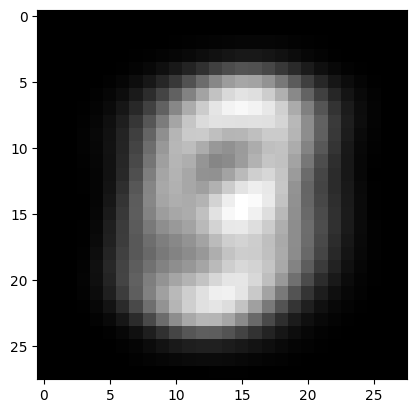

In [12]:
counts = np.zeros(28*28)
for i in range(len(train_dataset)):
    img, label = train_dataset[i]
    img = img.numpy()
    counts += img.flatten()
counts /= len(train_dataset)

plt.imshow(counts.reshape(28,28), cmap='gray')

In [33]:
counts_per_class = np.zeros((10, 28*28))
counts_per_class_num = np.zeros(10)
for i in range(len(train_dataset)):
    img, label = train_dataset[i]
    img = img.numpy()
    counts_per_class[label] += img.flatten()
    counts_per_class_num[label] += 1
    
counts_per_class /= counts_per_class_num[:,None]

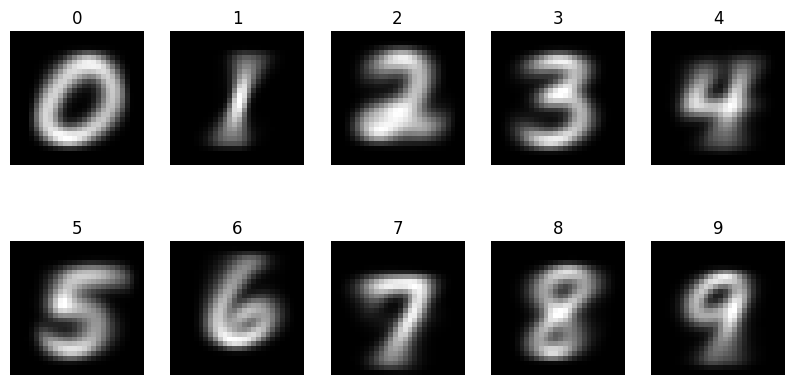

In [32]:
# Show averges in a 2 by 5 grid
fig, ax = plt.subplots(2,5, figsize=(10,5))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(counts_per_class[i*5+j].reshape(28,28), cmap='gray')
        ax[i,j].set_title(i*5+j)
        ax[i,j].axis('off')
        
        

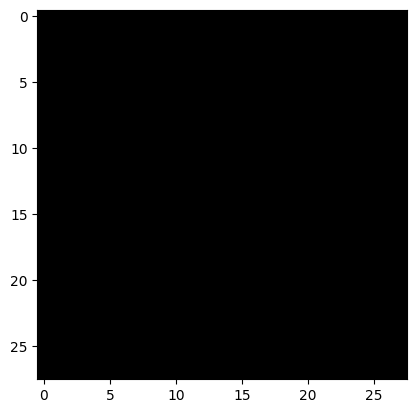

In [40]:
sample_label = 0

# Use softmax to get probabilities
label_counts = counts_per_class[sample_label]
label_counts = np.exp(label_counts) / np.sum(np.exp(label_counts))

# Pick a random number between 0 and 1
p = np.random.rand()

# pick pixels that are greater than p
sample = np.zeros(28*28)
sample[label_counts > p] = 1

# Show the sample
plt.imshow(sample.reshape(28,28), cmap='gray')

In [41]:
counts_per_class[0]


array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -0.9998305 ,
       -0.99966498, -0.99986228, -1.        , -0.99988082, -0.99967425,
       -0.99984507, -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -0.9999616 ,
       -0.99998676, -1.        , -0.99988744, -0.99973516, -0.99994174,
       -1.        , -1.        , -0.99987818, -0.99962658, -0.99